In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import truvari
import joblib
import glob
import os
from IPython.display import display, Markdown

ref_order = ["hg19", "grch38", "chm13"]
sb.set()

In [2]:
data = joblib.load("../stats/multi_sample_stats.jl")

In [5]:
data["AF"] = data["AF"].apply(lambda x: x[0])
data["HWE"] = data["HWE"].apply(lambda x: x[0])
data["ExcHet"] = data["ExcHet"].apply(lambda x: x[0])

In [58]:
def make_af_plots(m_af_dat, title_extra=""):
    title_extra = f" ({title_extra})" if title_extra else ""
    p = sb.catplot(data=m_af_dat, 
               x="inter_merge", 
               hue="reference", 
               y="mean", 
               col="intra_merge",
               order=["exact", "strict", "loose"],
               col_order=["exact", "strict", "loose"],
               hue_order=["hg19", "grch38", "chm13"])
    p.fig.subplots_adjust(top=0.9) 
    hide = p.fig.suptitle('Mean SV AF by intra/inter sample merge' + title_extra)
    plt.show()
    p = sb.catplot(data=m_af_dat, 
               x="inter_merge", 
               hue="reference", 
               y="50%", 
               col="intra_merge",
               order=["exact", "strict", "loose"],
               col_order=["exact", "strict", "loose"],
               hue_order=["hg19", "grch38", "chm13"])
    p.fig.subplots_adjust(top=0.9) 
    hide = p.fig.suptitle('Median SV AF by intra/inter sample merge' + title_extra)
    plt.show()

In [62]:
view = data.groupby(["reference", "intra_merge", "inter_merge"])
rows = []
for name, dat in view:
    d = dat["AF"].describe()
    d["reference"] = name[0]
    d["intra_merge"] = name[1]
    d["inter_merge"] = name[2]
    rows.append(d)
af_dat = pd.concat(rows, axis=1).T

view = data[data["AF"] >= 0.05].groupby(["reference", "intra_merge", "inter_merge"])
rows = []
for name, dat in view:
    d = dat["AF"].describe()
    d["reference"] = name[0]
    d["intra_merge"] = name[1]
    d["inter_merge"] = name[2]
    rows.append(d)
af_dat_5pct = pd.concat(rows, axis=1).T


view = data.groupby(["reference", "intra_merge", "inter_merge", "svtype"])
rows = []
for name, dat in view:
    d = dat["AF"].describe()
    d["reference"] = name[0]
    d["intra_merge"] = name[1]
    d["inter_merge"] = name[2]
    d["svtype"] = name[3]
    rows.append(d)
af_dat_byty = pd.concat(rows, axis=1).T

view = data[data["AF"] >= 0.05].groupby(["reference", "intra_merge", "inter_merge", "svtype"])
rows = []
for name, dat in view:
    d = dat["AF"].describe()
    d["reference"] = name[0]
    d["intra_merge"] = name[1]
    d["inter_merge"] = name[2]
    d["svtype"] = name[3]
    rows.append(d)
af_dat_5pct_byty = pd.concat(rows, axis=1).T

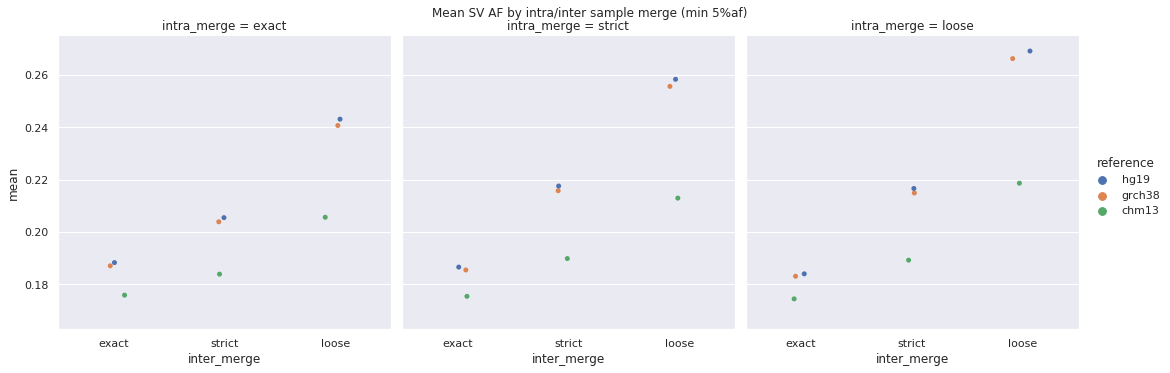

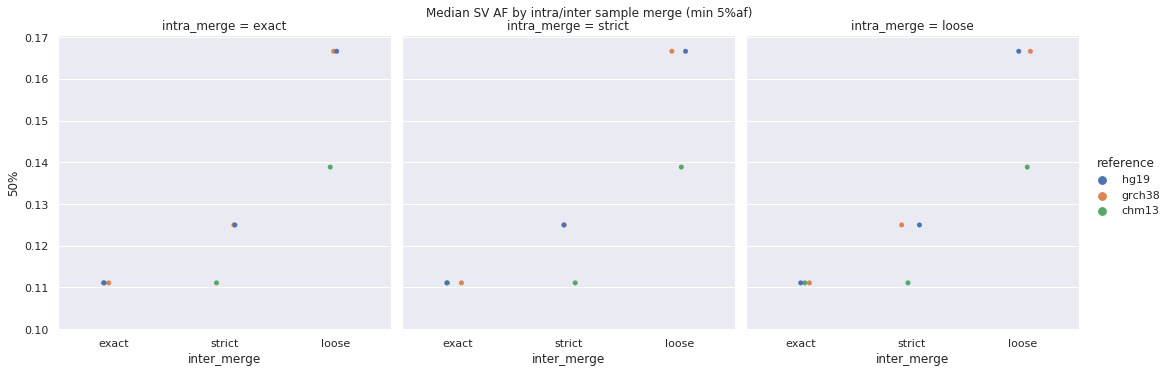

In [59]:
make_af_plots(af_dat_5pct, "min 5%af")

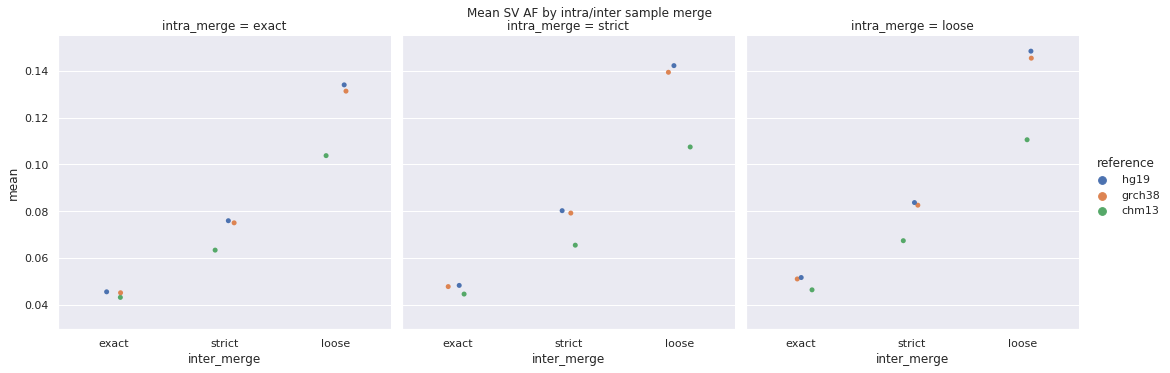

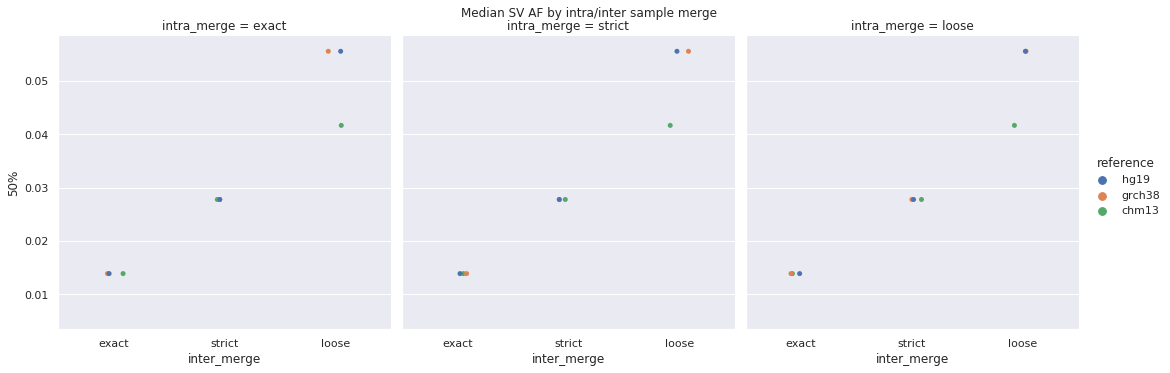

In [60]:
make_af_plots(af_dat)

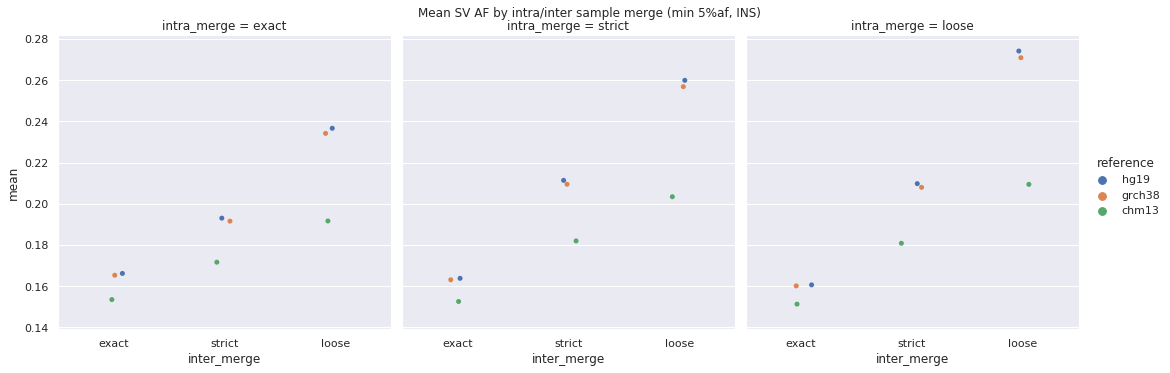

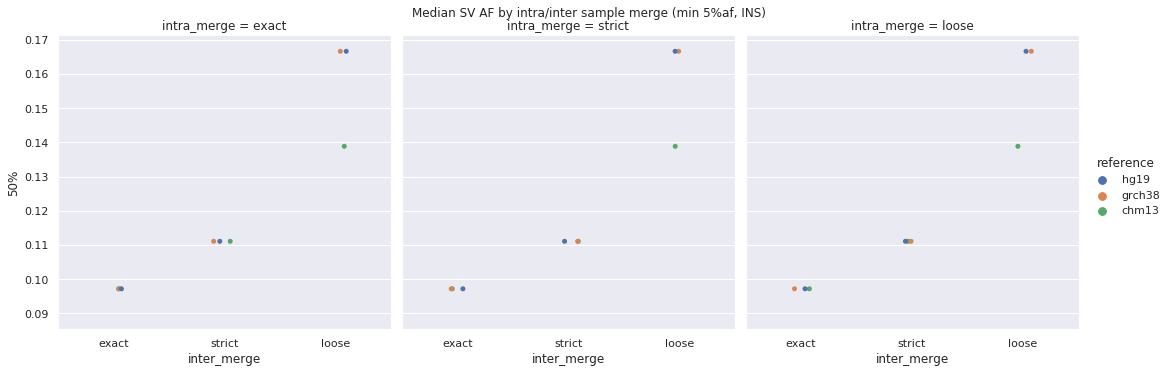

In [63]:
make_af_plots(af_dat_5pct_byty[af_dat_5pct_byty["svtype"] == "INS"], "min 5%af, INS")

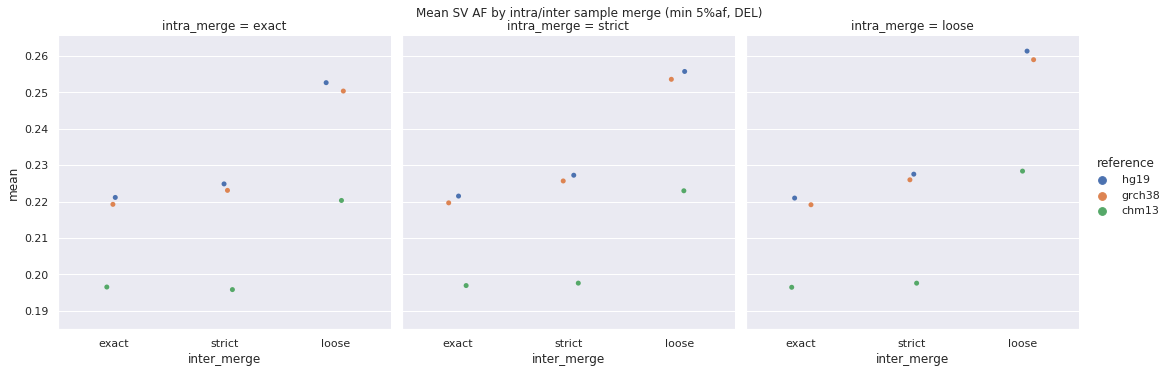

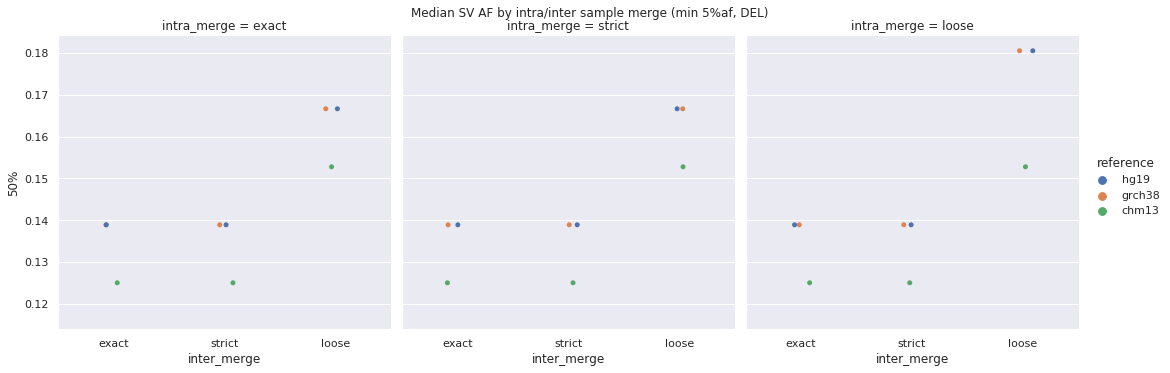

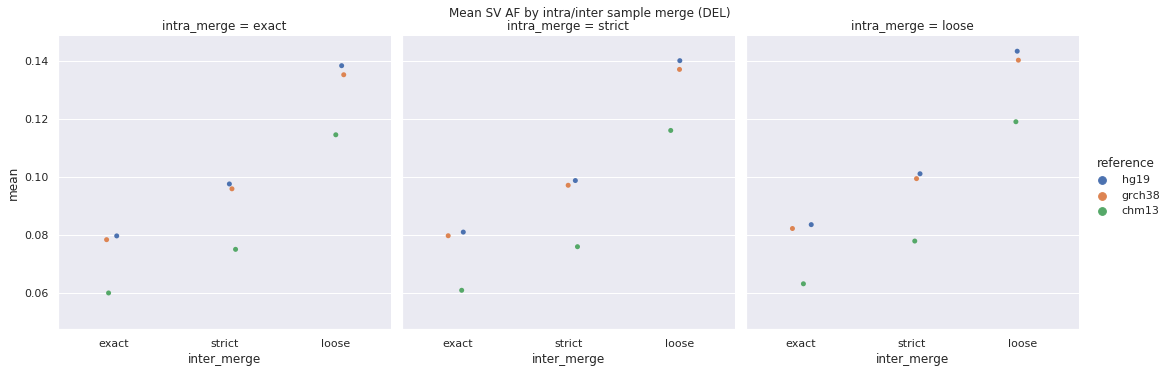

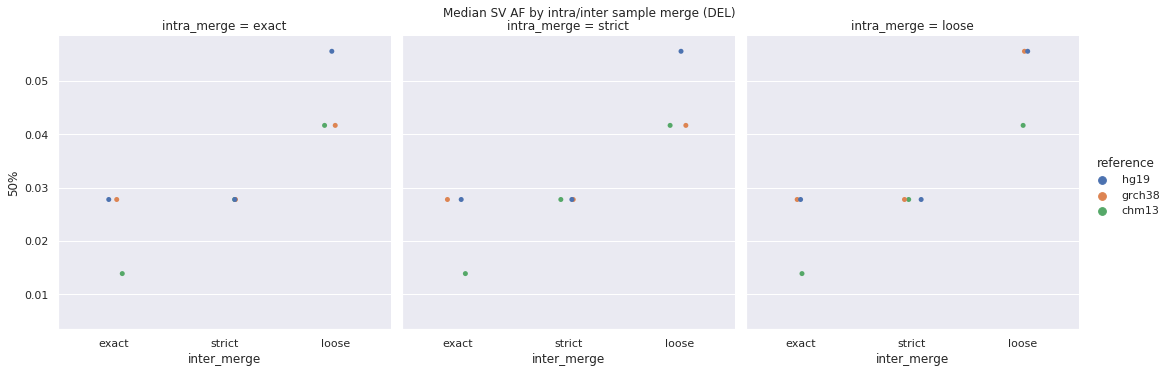

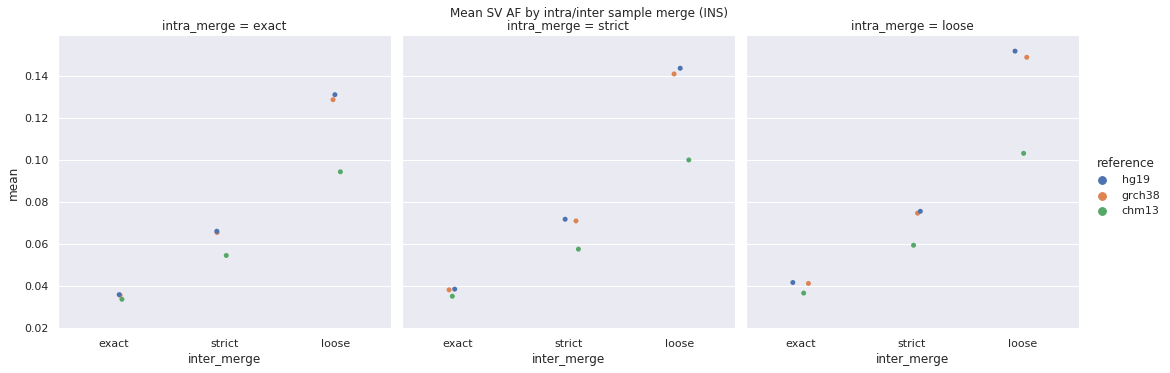

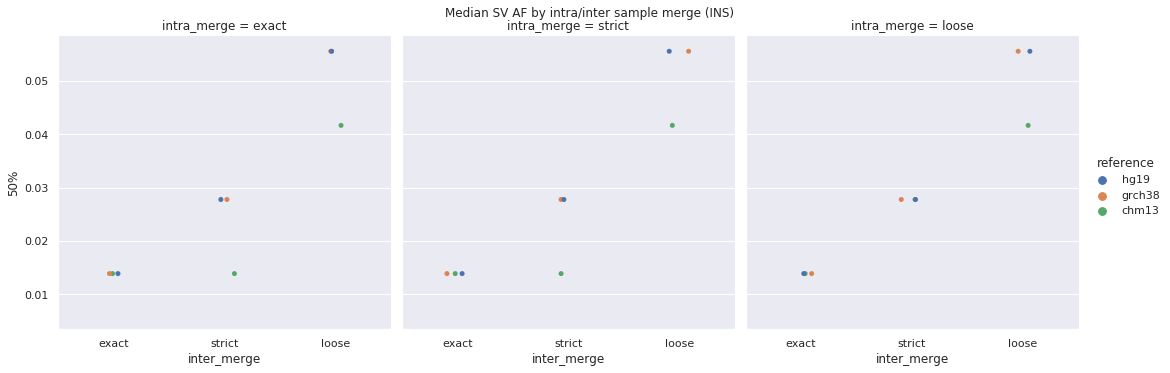

In [66]:
make_af_plots(af_dat_byty[af_dat_byty["svtype"] == "DEL"], "DEL")
make_af_plots(af_dat_byty[af_dat_byty["svtype"] == "INS"], "INS")